In [1]:
#Liner Regression using numerical data 


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
pwd


'C:\\Users\\dines\\Downloads\\jupiter note\\archive (2)'

In [7]:
df=pd.read_csv('C:\\Users\\dines\\Downloads\\jupiter note\\archive (2)/Accenture_stock_history.csv')

In [8]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0
...,...,...,...,...,...,...,...,...
5077,2021-09-23,337.619995,344.739990,337.130005,343.000000,4543400,0.0,0
5078,2021-09-24,340.679993,342.880005,337.720001,339.230011,2035900,0.0,0
5079,2021-09-27,337.519989,337.720001,333.079987,334.510010,2025300,0.0,0
5080,2021-09-28,331.559998,332.019989,323.859985,324.209991,2300500,0.0,0


In [9]:
#observing first five rows in dataset
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2001-07-19,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,2001-07-20,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,2001-07-23,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,2001-07-24,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,2001-07-25,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0


In [10]:
#to find data type of each column in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5082 entries, 0 to 5081
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5082 non-null   object 
 1   Open          5082 non-null   float64
 2   High          5082 non-null   float64
 3   Low           5082 non-null   float64
 4   Close         5082 non-null   float64
 5   Volume        5082 non-null   int64  
 6   Dividends     5082 non-null   float64
 7   Stock Splits  5082 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 317.8+ KB


In [11]:
#statistical Information about the data set
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,5082.000000,5082.000000,5082.000000,5082.000000,5.082000e+03,5082.000000,5082.0
mean,74.854864,75.536654,74.214846,74.918059,2.954039e+06,0.005389,0.0
std,70.934675,71.463018,70.422156,70.953071,2.608493e+06,0.072137,0.0
min,8.481324,9.121145,8.406926,8.816115,1.811000e+05,0.000000,0.0
25%,22.230564,22.638424,21.947345,22.346736,1.815850e+06,0.000000,0.0
50%,45.823045,46.408159,45.417967,45.787195,2.428350e+06,0.000000,0.0
75%,106.989943,107.688098,106.465280,107.035688,3.454825e+06,0.000000,0.0
max,345.000000,345.519989,341.500000,344.429993,8.965590e+07,1.460000,0.0


In [13]:
df.describe(include='float')

,Open,High,Low,Close,Dividends
count,5082.000000,5082.000000,5082.000000,5082.000000,5082.000000
mean,74.854864,75.536654,74.214846,74.918059,0.005389
std,70.934675,71.463018,70.422156,70.953071,0.072137
min,8.481324,9.121145,8.406926,8.816115,0.000000
25%,22.230564,22.638424,21.947345,22.346736,0.000000
50%,45.823045,46.408159,45.417967,45.787195,0.000000
75%,106.989943,107.688098,106.465280,107.035688,0.000000
max,345.000000,345.519989,341.500000,344.429993,1.460000


In [14]:
df.describe(include='int64')

,Volume,Stock Splits
count,5.082000e+03,5082.0
mean,2.954039e+06,0.0
std,2.608493e+06,0.0
min,1.811000e+05,0.0
25%,1.815850e+06,0.0
50%,2.428350e+06,0.0
75%,3.454825e+06,0.0
max,8.965590e+07,0.0


In [20]:
#dropping columns 
df.drop(['Date'],axis=1,inplace=True)

KeyError: "['Date'] not found in axis"

In [21]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,11.234038,11.375393,11.159640,11.286116,34994300,0.0,0
1,11.196839,11.196839,11.010845,11.167080,9238500,0.0,0
2,11.159637,11.167077,10.824848,11.159637,7501000,0.0,0
3,11.122439,11.137319,10.936445,11.055481,3537300,0.0,0
4,10.936445,11.122439,10.899246,11.122439,4208100,0.0,0
...,...,...,...,...,...,...,...
5077,337.619995,344.739990,337.130005,343.000000,4543400,0.0,0
5078,340.679993,342.880005,337.720001,339.230011,2035900,0.0,0
5079,337.519989,337.720001,333.079987,334.510010,2025300,0.0,0
5080,331.559998,332.019989,323.859985,324.209991,2300500,0.0,0


In [22]:
# finding missing value
df.isnull()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
5077,False,False,False,False,False,False,False
5078,False,False,False,False,False,False,False
5079,False,False,False,False,False,False,False
5080,False,False,False,False,False,False,False


In [23]:
#Finding the sum of missing values
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Univariate Analysis

In [30]:
#frequency matrix of open cloumn
df['High'].value_counts()

High
17.855423     3
20.124543     2
17.818219     2
13.168372     2
13.465963     2
             ..
29.474316     1
29.405072     1
29.489708     1
29.374303     1
326.410004    1
Name: count, Length: 5064, dtype: int64

<Axes: xlabel='High', ylabel='count'>

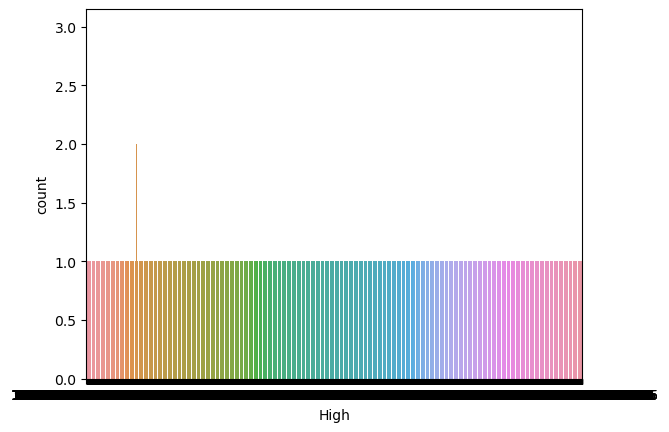

In [29]:
#bar chart plotting of frequency count
sns.countplot(x='High',data=df)

<Axes: ylabel='Open'>

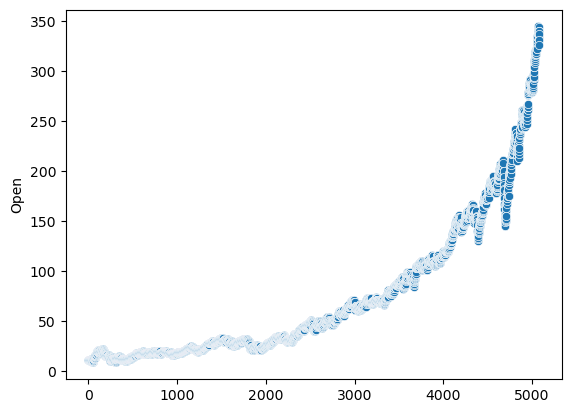

In [35]:
#looking at the scatter plot for high and low
sns.scatterplot(df['Open'])

In [36]:
#finding corealtion coefficient between open and close
df.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999924,0.999932,0.999873,-0.174633,0.053325,NaN
High,0.999924,1.000000,0.999882,0.999925,-0.173194,0.053368,NaN
Low,0.999932,0.999882,1.000000,0.999934,-0.176087,0.053625,NaN
Close,0.999873,0.999925,0.999934,1.000000,-0.174631,0.053449,NaN
Volume,-0.174633,-0.173194,-0.176087,-0.174631,1.000000,0.000631,NaN
Dividends,0.053325,0.053368,0.053625,0.053449,0.000631,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\ProgramData\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


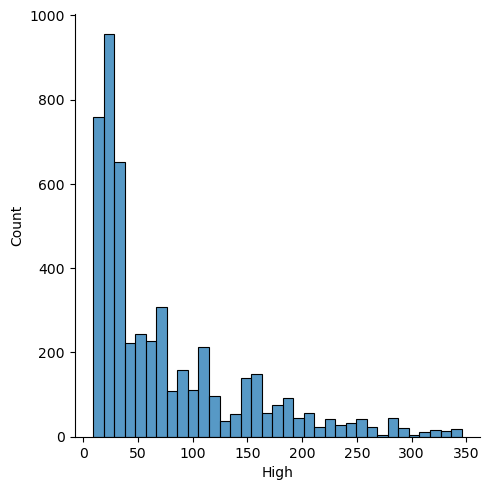

In [37]:
#distribution plot for 'high'
sns.displot(df['High'],kind='hist')

In [38]:
#Skew in  the distribution  of high cloumn
df['High'].skew()

1.4962014984820555

In [39]:
#Skew in  the distribution  of Lowc loumn
df['Low'].skew()

1.4977050659405824

<Axes: >

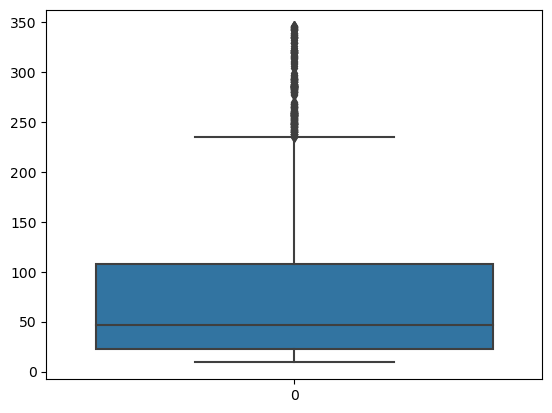

In [40]:
#outlier detection of HIGH cloumn
sns.boxplot(df['High'])

In [41]:
#assigning Independent variable 'High'as X
X=df['High']

In [42]:
X

0        11.375393
1        11.196839
2        11.167077
3        11.137319
4        11.122439
           ...    
5077    344.739990
5078    342.880005
5079    337.720001
5080    332.019989
5081    326.410004
Name: High, Length: 5082, dtype: float64

In [44]:
#assigning the dependent variable 'Close' as Y
y=df['Low']

In [45]:
y

0        11.159640
1        11.010845
2        10.824848
3        10.936445
4        10.899246
           ...    
5077    337.130005
5078    337.720001
5079    333.079987
5080    323.859985
5081    323.070007
Name: Low, Length: 5082, dtype: float64

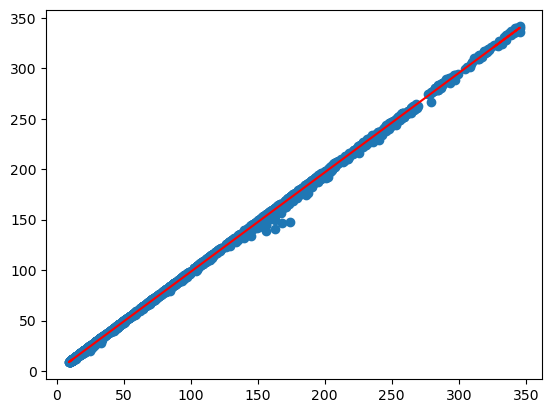

In [46]:
#to plot liner regression (Best Fit) line on scatter plot , using np.polyfit()
import numpy as np
plt.scatter(X,y)
m,b=np.polyfit(X,y,1) #m-Slope,b=intercept
plt.plot(X,m*X +b,'r')#we plot X and equation(m*X+b)

In [48]:
#creating  list of numeric columns
df.select_dtypes(include=[np.number]).columns.tolist()

['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']

In [49]:
#creating dataframe of numeric column
df_num=df[['High','Low','Open','Close']]
df_num

,High,Low,Open,Close
0,11.375393,11.159640,11.234038,11.286116
1,11.196839,11.010845,11.196839,11.167080
2,11.167077,10.824848,11.159637,11.159637
3,11.137319,10.936445,11.122439,11.055481
4,11.122439,10.899246,10.936445,11.122439
...,...,...,...,...
5077,344.739990,337.130005,337.619995,343.000000
5078,342.880005,337.720001,340.679993,339.230011
5079,337.720001,333.079987,337.519989,334.510010
5080,332.019989,323.859985,331.559998,324.209991


In [53]:
#creating a list of categorical values
df.select_dtypes(include=['object']).columns.tolist()


[]

In [ ]:
#converting categorical coulmn into  numeric  data  using get _dummies
df_dummies=pd.get_dummies(df['Stock Splits'])

In [52]:
df_dummies.tail()

,0
5077,True
5078,True
5079,True
5080,True
5081,True


In [54]:
#combined column wise , appending of columns
df_combined=pd.concat([df_num,df_dummies],axis=1)

In [55]:
#Modified Data Set
df_combined.head()

,High,Low,Open,Close,0
0,11.375393,11.159640,11.234038,11.286116,True
1,11.196839,11.010845,11.196839,11.167080,True
2,11.167077,10.824848,11.159637,11.159637,True
3,11.137319,10.936445,11.122439,11.055481,True
4,11.122439,10.899246,10.936445,11.122439,True


In [56]:
#finding missing null value
df_combined.isnull().sum(axis=0)

High     0
Low      0
Open     0
Close    0
0        0
dtype: int64

In [57]:
#putting featurevariable to X(ie X
X=df_combined.drop('High',axis=1)

In [58]:
#puttin response variable to y
y-df_combined['High']

0      -0.215753
1      -0.185994
2      -0.342229
3      -0.200874
4      -0.223193
          ...   
5077   -7.609985
5078   -5.160004
5079   -4.640015
5080   -8.160004
5081   -3.339996
Length: 5082, dtype: float64

In [59]:
X

,Low,Open,Close,0
0,11.159640,11.234038,11.286116,True
1,11.010845,11.196839,11.167080,True
2,10.824848,11.159637,11.159637,True
3,10.936445,11.122439,11.055481,True
4,10.899246,10.936445,11.122439,True
...,...,...,...,...
5077,337.130005,337.619995,343.000000,True
5078,337.720001,340.679993,339.230011,True
5079,333.079987,337.519989,334.510010,True
5080,323.859985,331.559998,324.209991,True


In [62]:
#Split the DATA
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((3557, 4), (3557,), (1525, 4), (1525,))

PErforming liner Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [68]:
#Representing  Liner Regression as Lm
lm=LinearRegression()
lm


LinearRegression()

In [69]:
#fit the model to   the training data
lm.fit(X_train,y_train)


TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [70]:
#print the intercept
print(lm.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [71]:
print(lm.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [72]:
coeff_df=pd.DataFrame(lm.coef_,X_test.columns,columns=['coefficient'])#lets see the coefficient

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
sns.scatterplot(df_combined['F'],df_combined['High'])

In [73]:
#Making prediction  using  the model
y_pred = lm.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [74]:
#model performance metrics
#Coefficent of determination (R Square)

In [75]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, y_pred)
r_squared=r2_score(y_test, y_pred)
r_squared

NameError: name 'y_pred' is not defined

In [76]:
from math import sqrt
rmse=sqrt(mse)
print("Mean_Squared_Error : ",mse)
print('Root_Mean_Squared_Error :',rmse)
print('r_squared_value:', r_squared)


NameError: name 'mse' is not defined

In [77]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1

NameError: name 'y_pred' is not defined